In [2]:
from sklearn.metrics import confusion_matrix

y_true = [2,0,2,2,0,1]
y_pred = [0,2,2,2,0,2]

In [3]:
confusion_matrix(y_true, y_pred)

array([[1, 0, 1],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

#### 이진 분류 결과표

클래스가 0 과 1 두 종류 밖에 없는 이진 분류의 경우에는 일반적으로 클래스 이름을 양성과 음성으로 표시한다. 이 때의 결과를 나타내는 이진 분류결과표(Binary Confusion Matrix)결과표는 다음과 같다.

            양성이라고 예측	음성이라고 예측
   
실제 양성	양성 예측이 맞음 (True Positive)	음성 예측이 틀림 (False Negative)

실제 음성	양성 예측이 틀림 (False Positive)	음성 예측이 맞음 (True Negative)

### 이진분류 시스템의 예

제품을 생산하는 제조공장에서는 완성된 제품에 대해 품질 테스트를 실시하여 불량품을 찾아내고 찾아낸 불량품은 공장으로 되돌린다(리콜, recall). 이 때 품질 테스트 결과가 양성이면 불량품이라고 예측한 것이고 음성이고 정상제품이라고 예측한 것이다.

- True Positive: 불량품을 불량품이라고 정확하게 예측
- True Negative: 정상제품을 정상제품이라고 정확하게 예측
- False Positive: 불량품을 정상제품이라고 잘못 예측
- False Negative: 정상제품을 불량품이라고 잘못 예측

In [5]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [6]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred,labels=[1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

### 평가 점수

#### 정확도

정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.

$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$

#### 정밀도

정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.

$\text{precision} = \dfrac{TP}{TP + FP}$

#### 재현율

재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.

$\text{recall} = \dfrac{TP}{TP + FN}$

#### 위양성율

위양성율(fall-out)은 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율을 말한다. 다른 평가점수와 달리 낮을수록 좋은 모형이다.

$\text{fallout} = \dfrac{FP}{FP + TN}$

#### F 점수

정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다.
정밀도에 주어지는 가중치를 베타(beta)라고 한다.

$F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})$

In [10]:
from sklearn.metrics import classification_report

y_true = [0,0,0,1,1,0,0,]
y_pred = [0,0,0,0,1,1,1,]

print(classification_report(y_true, y_pred, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [11]:
y_true = [0,0,1,1,2,2,2]
y_pred = [0,0,1,2,2,2,1]


In [ ]:
#              pricision      recall 
#class 0          1              1
#class 1         0.5            0.5
#class 2        0.67            0.67

In [12]:
y_true = [0,0,1,1,2,2,2]
y_pred = [0,0,1,2,2,2,1]
target_names = ['class 0','class 1','class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



#### ROC 커브

위에서 설명한 각종 평가 점수 중 재현율(recall)과 위양성률(fall-out)은 일반적으로 양의 상관 관계가 있다.

재현율을 높이기 위해서는 양성으로 판단하는 기준(threshold)을 낮추어 약간의 증거만 있어도 양성으로 판단하도록 하면 된다. 그러나 이렇게 되면 음성임에도 양성으로 판단되는 표본 데이터가 같이 증가하게 되어 위양성율이 동시에 증가한다. 반대로 위양성율을 낮추기 위해 양성을 판단하는 기준을 엄격하게 두게 되면 증거 부족으로 음성 판단을 받는 표본 데이터의 수가 같이 증가하므로 재현율이 떨어진다.


모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별함수(discriminant function)를 가지며 판별함수값이 음수이면 0인 클래스, 양수이면 1인 클래스에 해당한다고 판별한다. 즉 0 이 클래스 판별 기준값이 된다. ROC 커브는 이 클래스 판별 기준값이 달라진다면 판별 결과가 어떻게 달라지는지는 표현한 것이다.

사이킷런 패키지의 분류모형 클래스는 판별함수값을 계산하는 decision_function 메서드를 제공한다. 다음 표는 분류문제를 풀고 decision_function 메서드를 이용하여 모든 표본 데이터에 대해 판별함수값을 계산한 다음 계산된 판별함수값이 가장 큰 데이터부터 가장 작은 데이터 순서로 정렬한 것이다.

In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


ROC 커브는 이 표를 이용하여 다음과 같이 작성한다.

현재는 0을 기준값(threshold)으로 클래스를 구분하여 판별함수값이 0보다 크면 양성(Positive), 작으면 음성(negative)이 된다.
데이터 분류가 다르게 되도록 기준값을 증가 혹은 감소시킨다. 위의 표에서는 기준값을 0.244729보다 크도록 올리면 6번 데이터는 더이상 양성이 아니다.
기준값을 여러가지 방법으로 증가 혹은 감소시키면서 이를 반복하면 여러가지 다른 기준값에 대해 분류 결과가 달라지고 재현율, 위양성률 등의 성능평가 점수도 달라진다.
기준값 0을 사용하여 이진 분류결과표, 재현율, 위양성율을 계산하면 다음과 같다.

In [16]:
confusion_matrix(y, y_hat, labels=[1, 0])

array([[7, 1],
       [1, 7]], dtype=int64)

In [17]:
recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125



사이킷런 패키지는 위 과정을 자동화한 roc_curve 명령을 제공한다. 인수로는 타겟 y 벡터와 판별함수 벡터(혹은 확률 벡터)를 넣고 결과로는 변화되는 기준값과 그 기준값을 사용했을 때의 재현율과 위양성률을 반환한다.

In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.36316277,  2.36316277,  1.21967832,  0.37829565,  0.09428499,
        -0.76588836, -0.92693183, -4.11896895]))

In [20]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([1.9139748 , 0.9139748 , 0.77200693, 0.59346197, 0.5235538 ,
        0.31736921, 0.28354759, 0.01600107]))

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from c

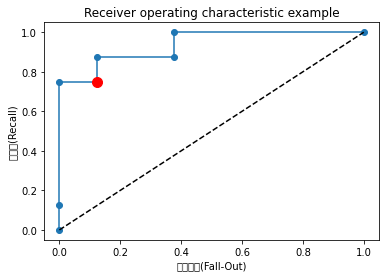

In [22]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [24]:
print(confusion_matrix(y,y_hat1))

[[940   3]
 [ 30  27]]


In [25]:
print(confusion_matrix(y,y_hat2))

[[940   3]
 [ 30  27]]


In [26]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [27]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from c

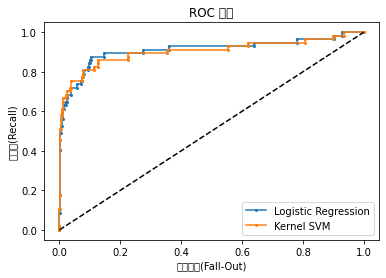

In [29]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()


#### AUC

AUC(Area Under the Curve)는 ROC curve의 면적을 뜻한다. 위양성률값이 같을 때 재현률값이 크거나 재현률값이 같을 때 위양성률값이 작을수록 AUC가 1에 가까운 값이고 좋은 모형이다.

In [30]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)


다중 클래스에 대해서는 정밀도, 재현율을 구하거나 ROC 커브를 그릴 수 없으므로 각각의 클래스에 대해 OvR 문제를 가정하고 각각의 OvR 문제에 대해 ROC 커브를 그린다.

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from c

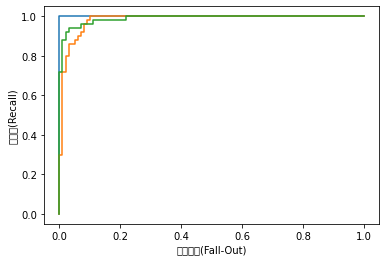

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()